## Observations and Insights 

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset


# Display the data table for preview


In [49]:
mouse_df = pd.DataFrame(mouse_metadata)
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [50]:
study_df = pd.DataFrame(study_results)
study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [51]:
# Combine the data into a single dataset

df = pd.merge(mouse_df, study_df, on="Mouse ID")
df

# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [53]:
df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [54]:
# Checking the number of mice.
df["Mouse ID"].value_counts()


g989    13
u196    10
e213    10
k403    10
o795    10
        ..
h428     1
l872     1
b447     1
u153     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [55]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [56]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup = df.duplicated(subset=["Mouse ID", "Timepoint"], keep='first')

df["dup"]= dup
df
# df.drop_duplicates(subset=["Mouse ID", "Timepoint"] , keep='first', inplace=False, ignore_index=False)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,dup
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [57]:
dup_df = df[dup]
dup_df

# Notice the table below does not show all of duplicated mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,dup
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [58]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_ID = dup_df["Mouse ID"].unique()

dup_mouse_ID_list = list(dup_mouse_ID)
dup_mouse_ID_list


['g989']

In [59]:
dup2_df= df[df["Mouse ID"].isin(dup_mouse_ID_list)]
dup2_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,dup
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [60]:
dup2_df.shape

(13, 9)

In [61]:
# From the table of duplicated mouse above, the Tumor Volumes are different even for the same Mouse ID at the same Time point.
# We do not know which data is right and which one should be dropped. In order to have accurate data for analysis, we better drop
# all duplicated data. (aka drop data of mouse g989). Also, dropping the whole data of mouse 989 meaning dropping 13 data points.
# This is equal to keeping 99.31% of origional data. This assure us a realiable analysis result.

In [62]:
(1893-13)/1893

0.9931325937665082

In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df["Mouse ID"] != 'g989'
df_clean = df.loc[mask].reset_index()
df_clean = df_clean.drop(["dup"], axis=1)
df_clean

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1875,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1876,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1877,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1878,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [64]:
# Checking the number of mice in the clean DataFrame.
df_clean["Mouse ID"].nunique()

248

In [65]:
# After dropping the duplicated data, cleaned data has one less mice than previous data

## Summary Statistics

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_groups = df_clean.groupby("Drug Regimen")

avg_tumor = drug_groups["Tumor Volume (mm3)"].mean()
med_tumor = drug_groups["Tumor Volume (mm3)"].median()
var_tumor = drug_groups["Tumor Volume (mm3)"].var()
std_tumor = drug_groups["Tumor Volume (mm3)"].std()
sem_tumor = drug_groups["Tumor Volume (mm3)"].sem()

summTable = pd.DataFrame()
summTable["Mean Tumor Volume"] = avg_tumor
summTable["Median Tumor Volume"] = med_tumor
summTable["Variance of Tumor Volume"] = var_tumor
summTable["Std of Tumor Volume"] = std_tumor
summTable["Sem of Tumor Volume"] = sem_tumor

summTable


,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Std of Tumor Volume,Sem of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_groups["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:
drug_groups.agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [69]:
drug_groups.size()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
dtype: int64

In [70]:
# drug_groups.size().index
# x = drug_groups.size().index
# y = drug_groups.size().values
# Tried to plot the above but not sorted

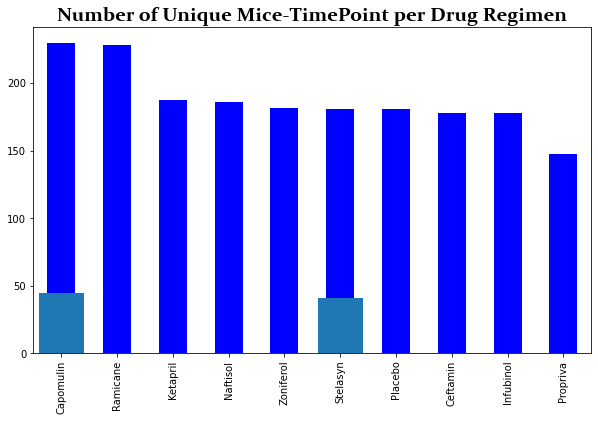

In [71]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
plt.figure(figsize=(10,6))
df_clean["Drug Regimen"].value_counts().plot(kind='bar', color = "blue")
plt.bar(x,y)
plt.title("Number of Unique Mice-TimePoint per Drug Regimen", fontweight ="bold", fontsize = 20, fontname = "Constantia")
plt.show()



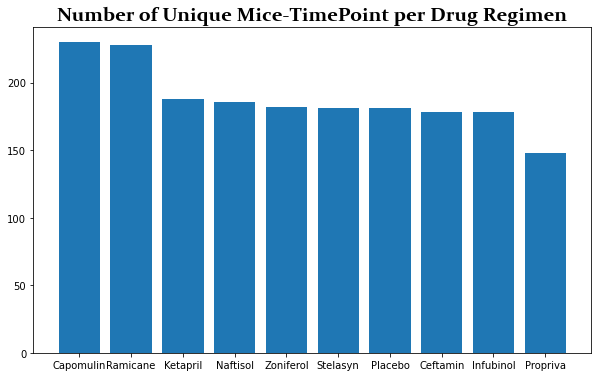

In [72]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
data = df_clean["Drug Regimen"].value_counts()
x = data.index
y = data.values

plt.figure(figsize=(10,6))
plt.bar(x,y)
plt.title("Number of Unique Mice-TimePoint per Drug Regimen", fontweight ="bold", fontsize = 20, fontname = "Constantia")
plt.show()

In [73]:
df_clean.groupby("Sex")["Mouse ID"].count()

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

In [74]:
df_clean.groupby(["Sex", "Mouse ID"]).size().reset_index().Sex.value_counts()

Male      125
Female    123
Name: Sex, dtype: int64

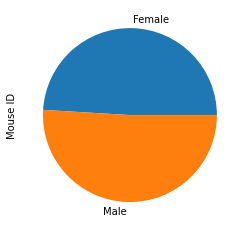

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_clean.groupby("Sex")["Mouse ID"].count().plot(kind="pie")


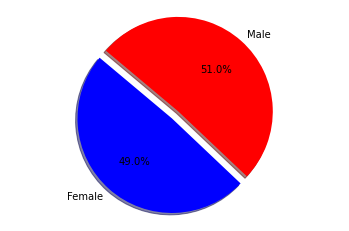

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = df_clean.groupby("Sex")["Mouse ID"].count()

genders = list(gender_data.index)
gender_count = list(gender_data.values)
colors = ["blue","red"]
explode = (0.1,0)


plt.pie(gender_count, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:

# Capomulin, Ramicane, Infubinol, and Ceftamin
df_final = df_clean.loc[df_clean["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])].reset_index(drop=True)
# Start by getting the last (greatest) timepoint for each mouse

maxMousse = df_final.groupby("Mouse ID").Timepoint.max().reset_index()

df_regimen2 =  pd.DataFrame()

for index, row in maxMousse.iterrows():
    mask = ((df_final["Mouse ID"] == row["Mouse ID"]) & (df_final["Timepoint"] == row["Timepoint"]))
    found = df_final.loc[mask]
    df_regimen2 = df_regimen2.append(found)
    
df_regimen2 = df_regimen2.reset_index(drop=True)
df_regimen2
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,493,a275,Ceftamin,Female,20,28,45,62.999356,3
3,327,a411,Ramicane,Male,3,22,45,38.407618,1
4,430,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...,...
95,1845,y769,Ceftamin,Female,6,27,45,68.594745,4
96,124,y793,Capomulin,Male,17,17,45,31.896238,2
97,1855,y865,Ceftamin,Male,23,26,45,64.729837,3
98,84,z578,Ramicane,Male,11,16,45,30.638696,0


In [78]:
df_regimen = df_final.merge(maxMousse, on=["Mouse ID", "Timepoint"])
df_regimen.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,k403,Ramicane,Male,21,16,45,22.050126,1
1,19,s185,Capomulin,Female,3,17,45,23.343598,1
2,29,x401,Capomulin,Female,16,15,45,28.484033,0
3,39,m601,Capomulin,Male,22,17,45,28.430964,1
4,49,g791,Ramicane,Male,11,16,45,29.128472,1


In [79]:
# Put treatments into a list for for loop (and later for plot labels)
drug_data = []

for drugs in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]:
    found = df_regimen.loc[df_regimen["Drug Regimen"] == drugs, "Tumor Volume (mm3)"]
    
    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = found.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(drugs)
    print()
    print(f"The lower quartile of temperatures is: {lowerq}")
    print(f"The upper quartile of temperatures is: {upperq}")
    print(f"The interquartile range of temperatures is: {iqr}")
    print(f"The the median of temperatures is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    print()
    print()

    drug_data.append(found.values)

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
#     Locate the rows which contain mice on each drug and get the tumor volumes
    
    
#     add subset 
    
    
#     Determine outliers using upper and lower bounds
    

Capomulin

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


Ramicane

The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


Infubinol

The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


Ceftamin

The lower quartile o

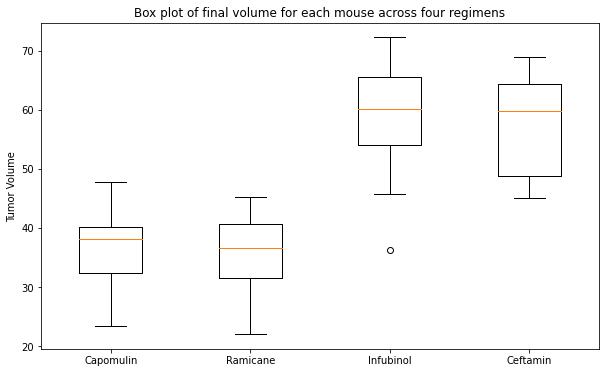

In [80]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(10,6))

plt.boxplot(drug_data, labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.title('Box plot of final volume for each mouse across four regimens')
plt.ylabel('Tumor Volume')

plt.show()

## Line and Scatter Plots

In [81]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = df_clean.loc[df_clean['Mouse ID'] == "y793"].reset_index(drop=True)
mouse




,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,115,y793,Capomulin,Male,17,17,0,45.000000,0
1,116,y793,Capomulin,Male,17,17,5,41.019913,0
2,117,y793,Capomulin,Male,17,17,10,41.630010,1
3,118,y793,Capomulin,Male,17,17,15,42.283665,1
4,119,y793,Capomulin,Male,17,17,20,40.716428,2
5,120,y793,Capomulin,Male,17,17,25,38.992734,2
6,121,y793,Capomulin,Male,17,17,30,35.726023,2
7,122,y793,Capomulin,Male,17,17,35,36.327870,2
8,123,y793,Capomulin,Male,17,17,40,31.475411,2
9,124,y793,Capomulin,Male,17,17,45,31.896238,2


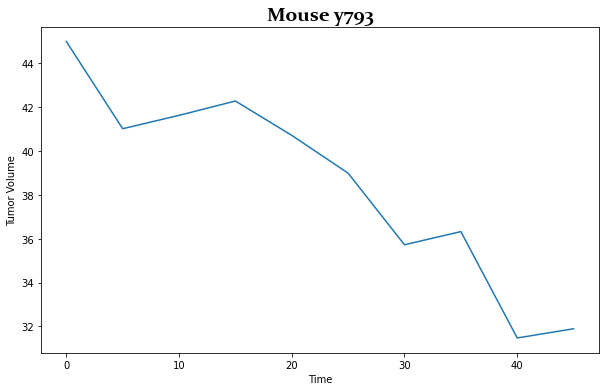

In [82]:
plt.figure(figsize=(10,6))

x = mouse.Timepoint
y = mouse["Tumor Volume (mm3)"]

plt.plot(x, y)

plt.title("Mouse y793", fontweight ="bold", fontsize = 20, fontname = "Constantia")
plt.xlabel('Time')
plt.ylabel("Tumor Volume")

plt.show()

In [83]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weightTumor_df = df_clean.loc[df_clean["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()
weightTumor_df.head()

<ipython-input-83-c8aeaa19be3f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weightTumor_df = df_clean.loc[df_clean["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


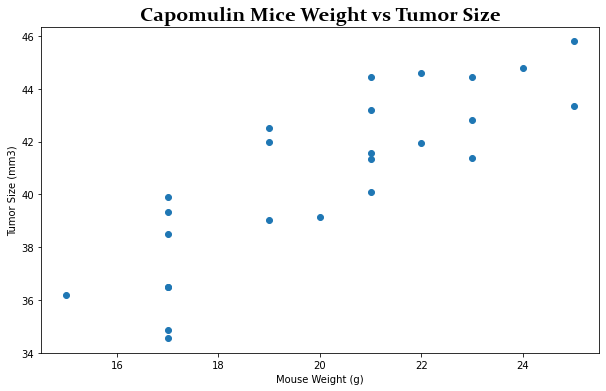

In [84]:
plt.figure(figsize=(10,6))

plt.scatter(weightTumor_df["Weight (g)"], weightTumor_df["Tumor Volume (mm3)"])
plt.title("Capomulin Mice Weight vs Tumor Size", fontweight ="bold", fontsize = 20, fontname = "Constantia")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Size (mm3)")

plt.show()

## Correlation and Regression

In [85]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as sts

In [86]:
 sts.pearsonr(weightTumor_df["Weight (g)"], weightTumor_df["Tumor Volume (mm3)"])

(0.8419363424694717, 1.322572243471279e-07)

In [87]:
feature = weightTumor_df["Weight (g)"]
target = weightTumor_df["Tumor Volume (mm3)"]

In [88]:
#model
X = sm.add_constant(feature)
Y = target


y = 0.95x + 21.55
The r-squared is: 0.7088568047708717


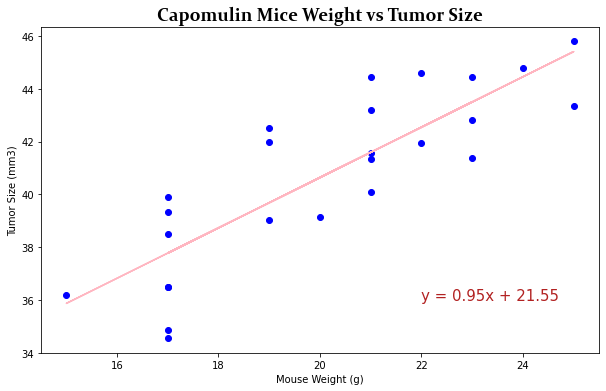

In [89]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(feature, target)
regress_values = feature * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")

plt.figure(figsize=(10,6))

plt.scatter(feature, target, color = "blue")
plt.title("Capomulin Mice Weight vs Tumor Size", fontsize=18, fontweight="bold", fontname = "Constantia")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Size (mm3)")
plt.plot(feature, regress_values, color="lightpink")
plt.annotate(line_eq,(22,36),fontsize=15,color="firebrick")

plt.show()